In [ ]:
!pip install pycaret[full]
import pycaret
pycaret.__version__


from pycaret.clustering import *
import pandas as pd


!kaggle datasets download -d imakash3011/customer-personality-analysis

!unzip customer-personality-analysis.zip

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached interpret-0.6.3-py3-none-any.whl.metadata (1.1 kB)
  Using cached explainerdashboard-0.4.7-py3-none-any.whl.metadata (3.8 kB)
  Using cached statsforecast-1.5.0-py3-none-any.whl.metadata (23 kB)
  Using cached mlflow-2.16.2-py3-none-any.whl.metadata (29 kB)
  Using cached gradio-4.44.0-py3-none-any.whl.metadata (15 kB)
  Using cached evidently-0.4.37-py3-none-any.whl.metadata (11 kB)
  Using cached fugue-0.8.7-py3-none-any.whl.metadata (17 kB)
  Using cached tune_sklearn-0.5.0-py3-none-any.whl.metadata (12 kB)
Using cached evidently-0.4.37-py3-none-any.whl (3.4 MB)
Using cached explainerdashboard-0.4.7-py3-none-any.whl (287 kB)
Using cached fugue-0.8.7-py3-none-any.whl (279 kB)
Using cached gradio-4.44.0-py3-none-any.whl (18.1 MB)
Using cached interpret-0.6.3-py3-none-any.whl (1.4 kB)
Using cached mlflow-2.16.2-py3-none-any.whl (26.7 MB)
Using cached statsforecast-1.5.0-py3-none-any.whl (99 kB)
Using cached t

In [ ]:
data = pd.read_csv('marketing_campaign.csv')

from pycaret.clustering import *
s = setup(data, session_id = 123, use_gpu = True)

,Description,Value
0,Session id,123
1,Original data shape,"(2240, 1)"
2,Transformed data shape,"(2240, 2240)"
3,Categorical features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Maximum one-hot encoding,-1
9,Encoding method,None


In [ ]:

kmeans = create_model('kmeans')


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0000,1.0000,0.9996,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:

models()


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse,Cluster
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...,Cluster 2
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...,Cluster 2
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...,Cluster 2
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...,Cluster 2
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...,Cluster 2
...,...,...
2235,10870\t1967\tGraduation\tMarried\t61223\t0\t1\...,Cluster 2
2236,4001\t1946\tPhD\tTogether\t64014\t2\t1\t10-06-...,Cluster 2
2237,7270\t1981\tGraduation\tDivorced\t56981\t0\t0\...,Cluster 2
2238,8235\t1956\tMaster\tTogether\t69245\t0\t1\t24-...,Cluster 2


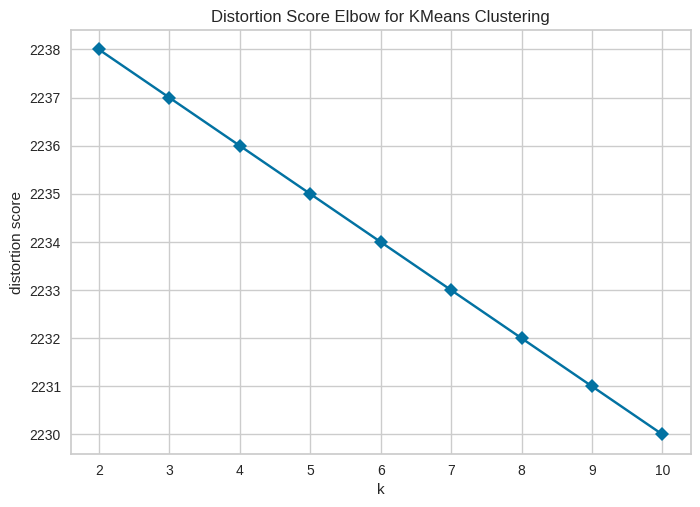

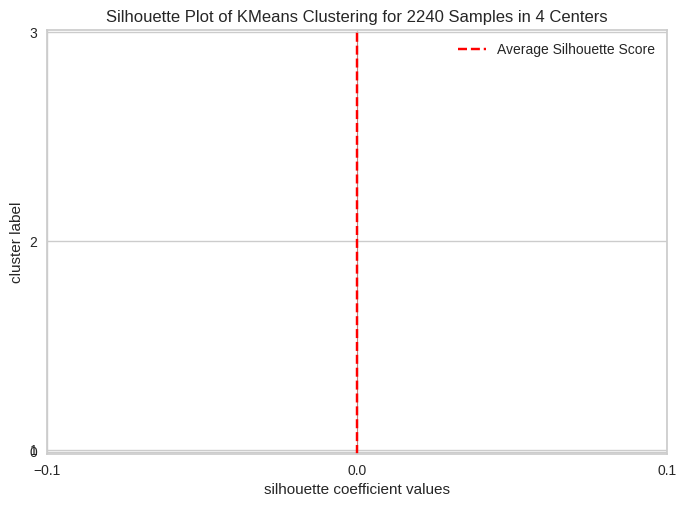

In [ ]:

plot_model(kmeans, plot = 'cluster')

plot_model(kmeans, plot = 'elbow')

plot_model(kmeans, plot = 'silhouette')

In [ ]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
kmeans_pred = predict_model(kmeans, data=data)
kmeans_pred

save_model(kmeans, 'kmeans_pipeline')

kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=[], transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['ID\tYear_Birth\tEducation\t'
                                             'Marital_Status\tIncome\tKidhome\t'
                                             'Teenhome\tDt_Customer\tRecency\t'
                                             'MntWines\tMntFruits\t'
                                             'MntMeatProducts\t'
                                             'MntFishProducts\t'
                                             'Mn...
                                                                    'MntGoldProds\t'
                                                                    'NumDealsPurchases\t'
                                                                    'NumWebPurchases\t'
                                                                    'NumCatalogPurchases\t'
                                                                    'NumStorePurchases\t'
                                                                    'NumWebVisitsMonth\t'
                                                                    'AcceptedCmp3\t'
                                                                    'AcceptedCmp4\t'
                                                                    'AcceptedCmp5\t'
                                                                    'AcceptedCmp1\t'
                                                                    'AcceptedCmp2\t'
                                                                    'Complain\t'
                                                                    'Z_CostContact\t'
                                                                    'Z_Revenue\t'
                                                                    'Response'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])